In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv('cleaned_df_final.csv')
df.head()

,host_is_superhost,host_identity_verified,Dog(s) present,Pets live on this property,cancellation_policy,no_of_host_verifications,host_response_time,number_of_reviews,amenities_count,calculated_host_listings_count,...,days_since_calendar_updated,account_duration_days,space_char_count,neighborhood_overview_char_count,notes_char_count,host_about_char_count,space_char_count_grouped,description_char_count_grouped,neighborhood_overview_char_count_grouped,notes_char_count_grouped
0,0,1,0,0,2,4,2,207,10,2,...,28,1607,1000,0,0,372,20,20,1,1
1,1,1,0,0,3,6,1,43,16,6,...,0,1047,1000,167,1000,74,20,20,4,20
2,0,1,1,1,3,5,2,20,21,2,...,35,571,1000,669,155,343,20,20,14,4
3,0,1,0,0,3,5,1,38,13,1,...,49,1497,488,492,9,354,10,20,10,1
4,1,1,0,0,2,4,1,58,7,1,...,35,1314,1000,95,82,229,20,20,2,2


In [3]:
predictor_df = df.drop(["host_is_superhost"], axis = 1)

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [8]:
def variance_threshold_selector(data, threshold=.8 * (1 - .8)):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [17]:
predictor_df.columns

Index(['host_identity_verified', 'Dog(s) present',
       'Pets live on this property', 'cancellation_policy',
       'no_of_host_verifications', 'host_response_time', 'number_of_reviews',
       'amenities_count', 'calculated_host_listings_count',
       'reviews_per_month', 'price', 'security_deposit', 'cleaning_fee',
       'availability_365', 'listing_duration_days', 'hosting_duration_days',
       'price_per_person', 'days_since_calendar_updated',
       'account_duration_days', 'space_char_count',
       'neighborhood_overview_char_count', 'notes_char_count',
       'host_about_char_count', 'space_char_count_grouped',
       'description_char_count_grouped',
       'neighborhood_overview_char_count_grouped', 'notes_char_count_grouped'],
      dtype='object')

In [16]:
predictor_df.shape

(2803, 27)

In [13]:
variance_threshold_selector(predictor_df).columns

Index(['Pets live on this property', 'cancellation_policy',
       'no_of_host_verifications', 'host_response_time', 'number_of_reviews',
       'amenities_count', 'calculated_host_listings_count',
       'reviews_per_month', 'price', 'security_deposit', 'cleaning_fee',
       'availability_365', 'listing_duration_days', 'hosting_duration_days',
       'price_per_person', 'days_since_calendar_updated',
       'account_duration_days', 'space_char_count',
       'neighborhood_overview_char_count', 'notes_char_count',
       'host_about_char_count', 'space_char_count_grouped',
       'description_char_count_grouped',
       'neighborhood_overview_char_count_grouped', 'notes_char_count_grouped'],
      dtype='object')

In [18]:
variance_threshold_selector(predictor_df).shape

(2803, 25)

'host_identity_verified', 'Dog(s) present' filtered out due to low Variance

In [4]:
sh_df = df['host_is_superhost']

In [21]:
from sklearn.feature_selection import SelectKBest

In [22]:
selector = SelectKBest(k = 20)
selector.fit(predictor_df, sh_df)

SelectKBest(k=20, score_func=<function f_classif at 0x1a16829c80>)

In [30]:
cols = selector.get_support(indices=True)
selected_pred_df = predictor_df.iloc[:,cols]

In [31]:
selected_pred_df.shape

(2803, 20)

In [34]:
selected_pred_df.columns

Index(['host_identity_verified', 'Dog(s) present',
       'Pets live on this property', 'cancellation_policy',
       'no_of_host_verifications', 'host_response_time', 'number_of_reviews',
       'amenities_count', 'calculated_host_listings_count',
       'reviews_per_month', 'listing_duration_days', 'price_per_person',
       'days_since_calendar_updated', 'space_char_count',
       'neighborhood_overview_char_count', 'notes_char_count',
       'space_char_count_grouped', 'description_char_count_grouped',
       'neighborhood_overview_char_count_grouped', 'notes_char_count_grouped'],
      dtype='object')

In [26]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [47]:
all_scores_dict = {}
for i, score in enumerate(selector.scores_):
    all_scores_dict[predictor_df.columns[i]] = score

In [41]:
import operator
sorted_d = sorted(all_scores_dict.items(), key=operator.itemgetter(1),reverse = True)
sorted_d

[('reviews_per_month', 195.90293048751994),
 ('number_of_reviews', 133.86689282763504),
 ('host_response_time', 85.23972613433544),
 ('neighborhood_overview_char_count_grouped', 54.524372212763566),
 ('neighborhood_overview_char_count', 53.17114148648972),
 ('calculated_host_listings_count', 47.92716715612462),
 ('days_since_calendar_updated', 39.59288922489987),
 ('host_identity_verified', 37.86914646721763),
 ('Pets live on this property', 36.607219572301915),
 ('notes_char_count', 29.582513328976443),
 ('notes_char_count_grouped', 28.316904943438747),
 ('Dog(s) present', 28.066423170017103),
 ('listing_duration_days', 25.58713716940699),
 ('amenities_count', 22.736459461512833),
 ('no_of_host_verifications', 21.116334561131143),
 ('description_char_count_grouped', 20.040351769147712),
 ('price_per_person', 19.288913755603076),
 ('space_char_count', 12.824095779319775),
 ('space_char_count_grouped', 12.618214637517983),
 ('cancellation_policy', 9.057888277576676),
 ('security_deposit

Print Feature Importance using ExtraTreesClassifier

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

In [51]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0, class_weight='balanced')

Rankings:
Feature 9) reviews_per_month: 0.068
Feature 6) number_of_reviews: 0.066
Feature 8) calculated_host_listings_count: 0.059
Feature 14) listing_duration_days: 0.047
Feature 5) host_response_time: 0.045
Feature 15) hosting_duration_days: 0.041
Feature 20) neighborhood_overview_char_count: 0.041
Feature 18) account_duration_days: 0.041
Feature 16) price_per_person: 0.041
Feature 22) host_about_char_count: 0.040
Feature 7) amenities_count: 0.038
Feature 21) notes_char_count: 0.037
Feature 25) neighborhood_overview_char_count_grouped: 0.037
Feature 17) days_since_calendar_updated: 0.036
Feature 12) cleaning_fee: 0.036
Feature 13) availability_365: 0.035
Feature 10) price: 0.035
Feature 11) security_deposit: 0.034
Feature 4) no_of_host_verifications: 0.034
Feature 26) notes_char_count_grouped: 0.034
Feature 3) cancellation_policy: 0.033
Feature 19) space_char_count: 0.030
Feature 23) space_char_count_grouped: 0.030
Feature 0) host_identity_verified: 0.020
Feature 2) Pets live on this

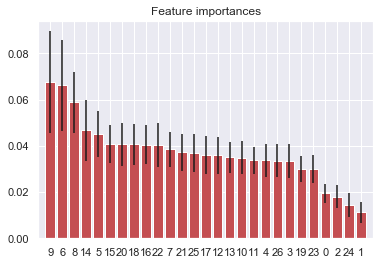

In [52]:
forest.fit(predictor_df, sh_df)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Rankings:")

for f in range(predictor_df.shape[1]):
    print("Feature %d) %s: %.3f" % (indices[f], predictor_df.columns[(indices[f])], round(importances[indices[f]], 3)))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(predictor_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(predictor_df.shape[1]), indices)
plt.xlim([-1, predictor_df.shape[1]])
plt.show()

#The lines near the top of each bar are error bars that indicate the error or uncertainty 

Decision: to remove description_char_count_grouped and maybe the Boolean variables 

Print Feature Importance using Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
clf = RandomForestClassifier(n_estimators=108, random_state=0, class_weight = 'balanced')

In [15]:
clf.fit(predictor_df, sh_df)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=108,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Rankings:
Feature 6) number_of_reviews: 0.107
Feature 9) reviews_per_month: 0.095
Feature 14) listing_duration_days: 0.066
Feature 16) price_per_person: 0.063
Feature 18) account_duration_days: 0.051
Feature 22) host_about_char_count: 0.051
Feature 10) price: 0.049
Feature 13) availability_365: 0.043
Feature 8) calculated_host_listings_count: 0.043
Feature 15) hosting_duration_days: 0.042
Feature 20) neighborhood_overview_char_count: 0.041
Feature 7) amenities_count: 0.037
Feature 21) notes_char_count: 0.035
Feature 17) days_since_calendar_updated: 0.033
Feature 12) cleaning_fee: 0.033
Feature 25) neighborhood_overview_char_count_grouped: 0.030
Feature 11) security_deposit: 0.028
Feature 19) space_char_count: 0.026
Feature 5) host_response_time: 0.025
Feature 26) notes_char_count_grouped: 0.025
Feature 4) no_of_host_verifications: 0.020
Feature 23) space_char_count_grouped: 0.019
Feature 3) cancellation_policy: 0.013
Feature 2) Pets live on this property: 0.008
Feature 24) description_

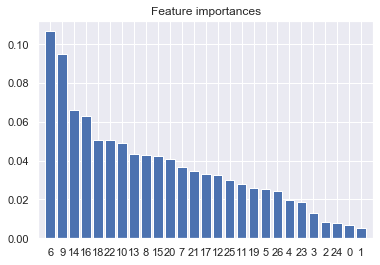

In [16]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Rankings:")

for f in range(predictor_df.shape[1]):
    print("Feature %d) %s: %.3f" % (indices[f], predictor_df.columns[(indices[f])], round(importances[indices[f]], 3)))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(predictor_df.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(predictor_df.shape[1]), indices)
plt.xlim([-1, predictor_df.shape[1]])
plt.show()

#The lines near the top of each bar are error bars that indicate the error or uncertainty 

After viewing feature importances, compare performance after removing certain features

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(predictor_df, sh_df, test_size=0.2)

In [43]:
forest1=RandomForestClassifier(n_estimators=100, class_weight='balanced')

In [44]:
forest1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_train_pred1 = forest1.predict(X_train)
y_test_pred1 = forest1.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix

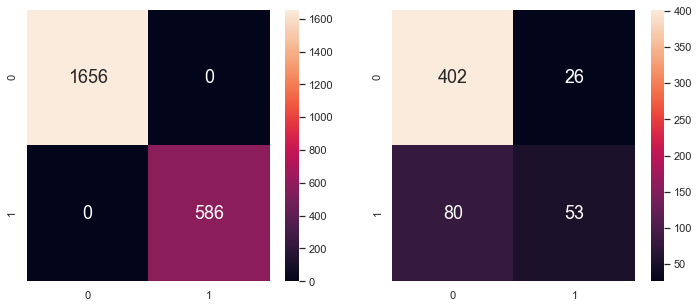

In [47]:
# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 5))
sb.heatmap(confusion_matrix(y_train, y_train_pred1), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


Remove last 3: description_char_count_grouped, host_identity_verified, Dog(s) present, 

In [11]:
from sklearn.feature_selection import SelectFromModel

Identify And Select Most Important Features and create a new model using only these features

In [31]:
sfm = SelectFromModel(forest1, threshold=0.01)

In [32]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight='balanced',
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=

Columns chosen:

In [33]:
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index])

cancellation_policy
no_of_host_verifications
host_response_time
number_of_reviews
amenities_count
calculated_host_listings_count
reviews_per_month
price
security_deposit
cleaning_fee
availability_365
listing_duration_days
hosting_duration_days
price_per_person
days_since_calendar_updated
account_duration_days
space_char_count
neighborhood_overview_char_count
notes_char_count
host_about_char_count
space_char_count_grouped
neighborhood_overview_char_count_grouped
notes_char_count_grouped


removed 4 columns: 'host_identity_verified', 'Dog(s) present',
       'Pets live on this property’, ’description_char_count_grouped’

In [34]:
# Create A Data Subset With Only The Most Important Features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [39]:
forest2=RandomForestClassifier(n_estimators=100, class_weight='balanced')

In [40]:
forest2.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_train_pred2 = forest2.predict(X_important_train)
y_test_pred2 = forest2.predict(X_important_test)

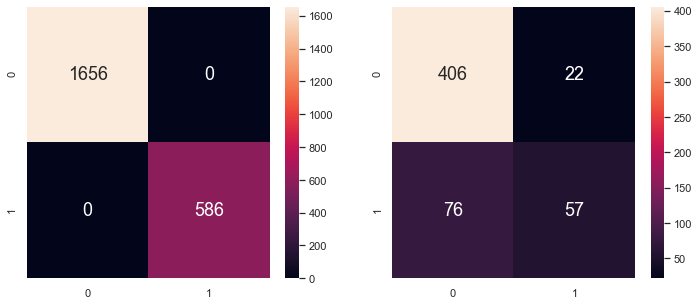

In [42]:
# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 5))
sb.heatmap(confusion_matrix(y_train, y_train_pred2), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [54]:
print("Goodness of Fit of Model using all features \t\tTest Dataset")
print("Classification Accuracy \t\t\t\t:", forest1.score(X_test, y_test))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model using less features \t \tTest Dataset")
print("Classification Accuracy \t\t\t\t:", forest2.score(X_important_test, y_test))
print()

Goodness of Fit of Model using all features 		Test Dataset
Classification Accuracy 				: 0.8110516934046346

Goodness of Fit of Model using less features 	 	Test Dataset
Classification Accuracy 				: 0.8253119429590018



Slight increase in test set performance after removing the features from test set

In [59]:
predictor_df.drop(['host_identity_verified', 'Dog(s) present', 'Pets live on this property', 'description_char_count_grouped'], axis = 1)



,cancellation_policy,no_of_host_verifications,host_response_time,number_of_reviews,amenities_count,calculated_host_listings_count,reviews_per_month,price,security_deposit,cleaning_fee,...,price_per_person,days_since_calendar_updated,account_duration_days,space_char_count,neighborhood_overview_char_count,notes_char_count,host_about_char_count,space_char_count_grouped,neighborhood_overview_char_count_grouped,notes_char_count_grouped
0,2,4,2,207,10,2,4.07,85.0,0.0,0.0,...,21.250000,28,1607,1000,0,0,372,20,1,1
1,3,6,1,43,16,6,1.48,150.0,100.0,40.0,...,37.500000,0,1047,1000,167,1000,74,20,4,20
2,3,5,2,20,21,2,1.15,975.0,1000.0,300.0,...,88.636364,35,571,1000,669,155,343,20,14,4
3,3,5,1,38,13,1,0.89,450.0,700.0,125.0,...,75.000000,49,1497,488,492,9,354,10,10,1
4,2,4,1,58,7,1,2.46,80.0,150.0,0.0,...,40.000000,35,1314,1000,95,82,229,20,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,3,5,3,10,9,1,1.18,120.0,0.0,75.0,...,30.000000,153,257,983,340,1000,0,20,7,20
2799,3,5,1,5,22,1,1.56,154.0,150.0,85.0,...,30.800000,4,1519,232,408,519,335,5,9,11
2800,2,4,2,2,15,1,0.63,65.0,0.0,20.0,...,21.666667,7,702,730,615,175,0,15,13,4
2801,2,5,1,73,19,3,4.01,95.0,500.0,0.0,...,23.750000,1,1220,1000,1000,795,714,20,20,16


Recursive Feature Elimination

In [60]:
from sklearn.feature_selection import RFE

In [64]:
rfe = RFE(forest1, 20)

In [65]:
fit = rfe.fit(predictor_df, sh_df)

In [82]:
count = 0
print("Selected Columns")
for col in fit.support_:
    if col == True:
        print(predictor_df.columns[count], end = ', ')
    count+=1

count = 0
print("\n")
print("Dropped Columns")
for col in fit.support_:
    if col == False:
        print(predictor_df.columns[count], end = ', ')
    count+=1

print("\n")
print("Feature Ranking (1 is the highest; denotes selection): %s" % fit.ranking_)

Selected Columns
host_response_time, number_of_reviews, amenities_count, calculated_host_listings_count, reviews_per_month, price, security_deposit, cleaning_fee, availability_365, listing_duration_days, hosting_duration_days, price_per_person, days_since_calendar_updated, account_duration_days, space_char_count, neighborhood_overview_char_count, notes_char_count, host_about_char_count, neighborhood_overview_char_count_grouped, notes_char_count_grouped, 

Dropped Columns
host_identity_verified, Dog(s) present, Pets live on this property, cancellation_policy, no_of_host_verifications, space_char_count_grouped, description_char_count_grouped, 

Feature Ranking (1 is the highest; denotes selection): [8 7 6 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 5 1 1]


To drop from predictors: host_identity_verified, Dog(s) present, Pets live on this property, description_char_count_grouped, cancellation_policy